In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
co2data=pd.read_csv("CO2 Emissions_Canada.csv")
co2data

,Make,Model,Vehicle_Class,Engine_Size_L_,Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
co2data.dtypes

Make                                 object
Model                                object
Vehicle_Class                        object
Engine_Size_L_                      float64
Cylinders                             int64
Transmission                         object
Fuel_Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2_Emissions_g_km_                   int64
dtype: object

In [4]:
co2data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L_', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_Emissions_g_km_'],
      dtype='object')

In [5]:
co2data.shape

(7385, 12)

In [6]:
co2data.isnull().sum()

Make                                0
Model                               0
Vehicle_Class                       0
Engine_Size_L_                      0
Cylinders                           0
Transmission                        0
Fuel_Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2_Emissions_g_km_                 0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [8]:
le=LabelEncoder()
co2data['Make'] = le.fit_transform(co2data.Make)
co2data['Make'] = co2data['Make'].astype("int64")
le.classes_

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUGATTI', 'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE',
       'FIAT', 'FORD', 'GENESIS', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI',
       'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'MASERATI', 'MAZDA', 'MERCEDES-BENZ', 'MINI',
       'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION',
       'SMART', 'SRT', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype=object)

In [9]:
co2data['Model'] = le.fit_transform(co2data.Model)
co2data['Model'] = co2data['Model'].astype("int64")
le.classes_

array(['124 SPIDER', '124 Spider', '1500', ..., 'tC', 'xB', 'xD'],
      dtype=object)

In [10]:
co2data['Vehicle_Class'] = le.fit_transform(co2data.Vehicle_Class)
co2data['Vehicle_Class'] = co2data['Vehicle_Class'].astype("int64")
le.classes_

array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
       'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
       'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
       'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
      dtype=object)

In [11]:
co2data['Transmission'] = le.fit_transform(co2data.Transmission)
co2data['Transmission'] = co2data['Transmission'].astype("int64")
le.classes_

array(['A10', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6', 'AM7',
       'AM8', 'AM9', 'AS10', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9',
       'AV', 'AV10', 'AV6', 'AV7', 'AV8', 'M5', 'M6', 'M7'], dtype=object)

In [12]:
co2data['Fuel_Type'] = le.fit_transform(co2data.Fuel_Type)
co2data['Fuel_Type'] = co2data['Fuel_Type'].astype("int64")
le.classes_

array(['D', 'E', 'N', 'X', 'Z'], dtype=object)

In [13]:
#co2data['Make', 'Model', 'Vehicle_Class','Transmission', 'Fuel_Type'] = le.fit_transform(co2data['Make', 'Model', 'Vehicle_Class','Transmission', 'Fuel_Type'])
#co2data['Make', 'Model', 'Vehicle_Class','Transmission', 'Fuel_Type'] = co2data['Make', 'Model', 'Vehicle_Class','Transmission', 'Fuel_Type']

In [14]:
co2data

,Make,Model,Vehicle_Class,Engine_Size_L_,Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [15]:
co2data.dtypes

Make                                  int64
Model                                 int64
Vehicle_Class                         int64
Engine_Size_L_                      float64
Cylinders                             int64
Transmission                          int64
Fuel_Type                             int64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2_Emissions_g_km_                   int64
dtype: object

In [16]:
co2data.Model.unique()


array([1057, 1058, 1233, ..., 1822,  389, 1950], dtype=int64)

In [17]:
co2data.describe()

,Make,Model,Vehicle_Class,Engine_Size_L_,Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,19.570210,1023.658768,6.364523,3.160068,5.615030,14.027759,3.262153,12.556534,9.041706,10.975071,27.481652,250.584699
std,11.311625,577.022369,4.822959,1.354170,1.828307,7.260507,0.882482,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.000000,0.000000,0.000000,0.900000,3.000000,0.000000,0.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,9.000000,531.000000,2.000000,2.000000,4.000000,6.000000,3.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,18.000000,999.000000,6.000000,3.000000,6.000000,15.000000,3.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,29.000000,1524.000000,11.000000,3.700000,6.000000,17.000000,4.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,41.000000,2052.000000,15.000000,8.400000,16.000000,26.000000,4.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [18]:
co2data.corr()

,Make,Model,Vehicle_Class,Engine_Size_L_,Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
Make,1.000000,0.012679,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Model,0.012679,1.000000,0.190713,0.070426,0.048399,-0.016260,-0.079554,0.101590,0.161755,0.123675,-0.098375,0.105847
Vehicle_Class,-0.029558,0.190713,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine_Size_L_,-0.146199,0.070426,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.048399,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.016260,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel_Type,0.045368,-0.079554,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.101590,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.161755,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.123675,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052


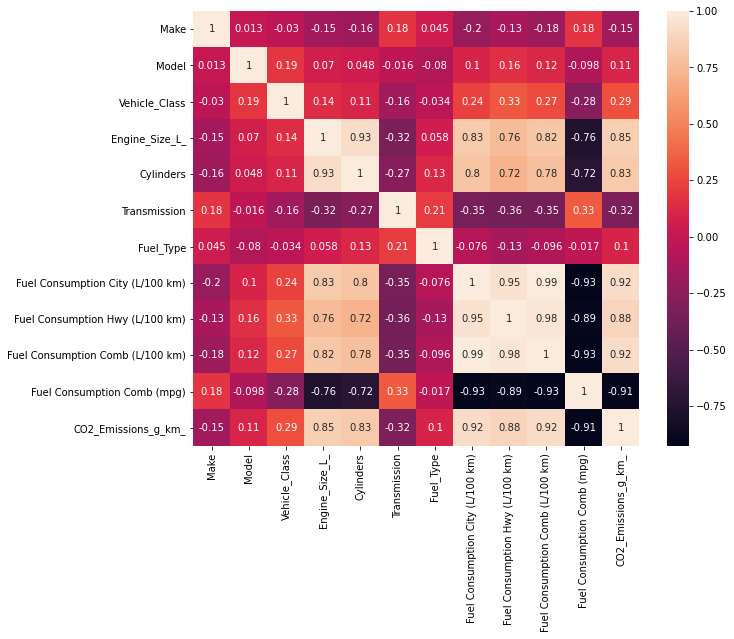

In [19]:
corr = co2data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [20]:
co2data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size_L_', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2_Emissions_g_km_'],
      dtype='object')

In [21]:
X=np.array(co2data.drop(['CO2_Emissions_g_km_'],1))
y=np.array(co2data['CO2_Emissions_g_km_'])

In [22]:
X

array([[   0. , 1057. ,    0. , ...,    6.7,    8.5,   33. ],
       [   0. , 1057. ,    0. , ...,    7.7,    9.6,   29. ],
       [   0. , 1058. ,    0. , ...,    5.8,    5.9,   48. ],
       ...,
       [  41. , 1960. ,   11. , ...,    8.6,   10.3,   27. ],
       [  41. , 1968. ,   12. , ...,    8.3,    9.9,   29. ],
       [  41. , 1969. ,   12. , ...,    8.7,   10.7,   26. ]])

In [23]:
y

array([196, 221, 136, ..., 240, 232, 248], dtype=int64)

In [24]:
#mean_x=np.mean(X)
#mean_y=np.mean(y)

In [25]:
#m= len(X)
#numer=0
#denom=0

In [26]:
#for i in range(m):
#    numer += (X[i]- mean_x)*(y[i]-mean_y)
#    denom +=(X[i]- mean_x)**2
#b1=numer /denom
#b0= mean_y - (b1* mean_x)
#print (b1,b0)

In [27]:
#plt.plot(X,y,color='blue', label='regression line')

In [28]:
#ss_t=0
#ss_r=0
#for i in range (m):
#    y_pred=b0 + b1*X[i]
#    ss_t += (y[i] - mean_y)**2
 #   ss_r +=(y[i] - y_pred)**2
#r2= 1-(ss_r/ss_t)
#print(r2)

In [29]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

#X = X.reshape((m,1))
#reg = LinearRegression()
#reg = reg.fit(X,y)
#y_pred= reg.predict(X)
#r2_score=reg.score(X,y)
#print(r2_score)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)
print(y_pred)

[210.19135486 210.00809052 181.1442982  ... 183.26018434 102.72340465
 196.23297967]


In [33]:
print(regressor.coef_)

[ 7.59667380e-02  3.53534996e-04  7.05340830e-01  5.57276068e+00
  5.78479307e+00 -6.74011577e-03  7.02794866e+00 -4.08093319e+00
 -1.16534058e+00  1.32773447e+01 -2.62429651e+00]


In [34]:
print(regressor.intercept_)

159.35908609657724


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9180220813241763

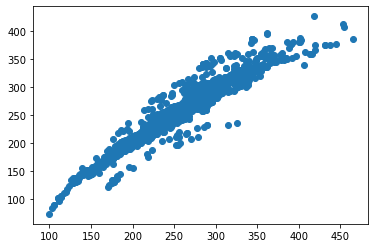

In [36]:
plt.scatter(y_test, y_pred)